In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from tqdm import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,f1_score
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import r2_score
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv('Data/data_price_house_processing.csv')
# df['Giá'] = df['Giá'].round(1)
# df = df.drop(columns='Đường trước nhà')
df

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6.0,3.0,3.0,3.0,3.0,0,1,0
1,5.7,58.7,4.0,5.0,2.0,2.0,2.0,0,1,0
2,7.0,80.0,4.0,12.0,4.0,4.0,5.0,0,1,0
3,4.8,68.0,4.0,5.0,2.0,4.0,3.0,0,1,0
4,800.0,28.0,35.0,6.0,2.0,1.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
36286,3.0,100.0,5.0,15.0,4.0,5.0,5.0,0,1,0
36287,10.0,200.0,10.0,15.0,4.0,3.0,3.0,0,1,0
36288,3.0,100.0,1.0,22.0,4.0,3.0,3.0,0,1,0
36289,3.5,342.0,1.0,1.0,1.0,1.0,1.0,0,1,0


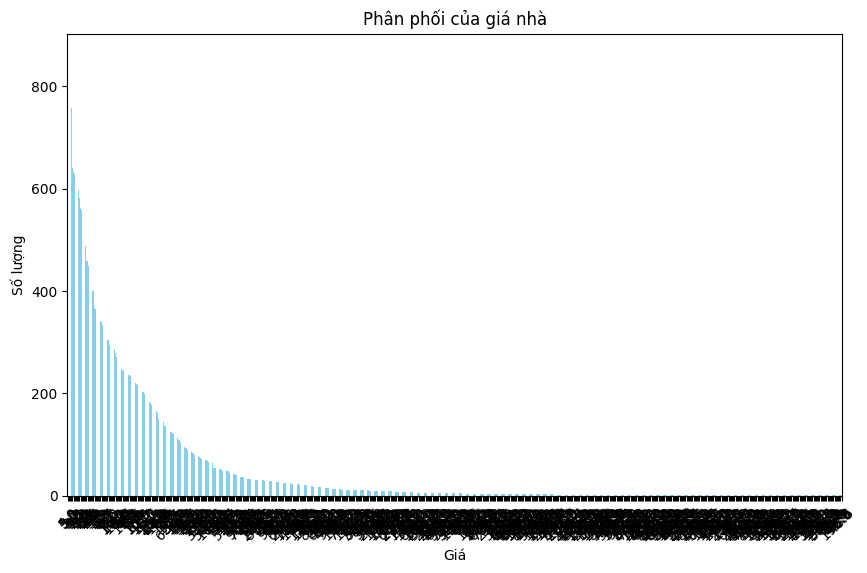

In [3]:
class_distribution = df['Giá'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân phối của giá nhà')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Hàm xây dựng mô hình Generator
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=noise_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(output_dim, activation='linear'))
    
    return model

# Hàm xây dựng mô hình Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=output_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hàm xây dựng mô hình GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(noise_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

# Hàm huấn luyện GAN
def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        generated_data = generator.predict(noise)
        
        real_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        labels_real = np.ones((batch_size, 1))
        
        labels_fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_data, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        labels_gan = np.ones((batch_size, 1))
        
        g_loss = gan.train_on_batch(noise, labels_gan)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

In [5]:
data_for_gan = df[df.columns].values

# Xây dựng mô hình GAN
noise_dim = 100
output_dim = data_for_gan.shape[1]

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Huấn luyện GAN
train_gan(generator, discriminator, gan, data_for_gan, epochs=5000, batch_size=64)




2/2 [==============================] - 0s 4ms/step


Epoch 0, D Loss: 6.15667861700058, G Loss: 0.8108938932418823
2/2 [==============================] - 0s 3ms/step
Epoch 100, D Loss: 0.030501035958877765, G Loss: 3.5754783153533936
2/2 [==============================] - 0s 3ms/step
Epoch 200, D Loss: 0.28298426419496536, G Loss: 4.550052642822266
2/2 [==============================] - 0s 2ms/step
Epoch 300, D Loss: 0.027013426180928946, G Loss: 5.751482963562012
2/2 [==============================] - 0s 2ms/step
Epoch 400, D Loss: 0.2031223103404045, G Loss: 4.528755187988281
2/2 [==============================] - 0s 3ms/step
Epoch 500, D Loss: 0.31224603950977325, G Loss: 3.431429386138916
2/2 [==============================] - 0s 2ms/step
Epoch 600, D Loss: 0.4680825173854828, G Loss: 2.7123827934265137
2/2 [==============================] - 0s 2ms/step
Epoch 700, D Loss: 0.307838037610054, G Loss: 2.934941291809082
2/2 [==============================] - 0s 2ms/step
Epoch 800, D 

In [6]:
# df['Giá'] = df['Giá'].round(1)
class_distribution = df['Giá'].value_counts()
class_distribution

4.0      860
5.6      842
3.0      803
5.0      758
3.8      641
        ... 
196.0      1
48.9       1
48.6       1
72.9       1
48.5       1
Name: Giá, Length: 665, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler
model_names = ['LinearRegression', 'RandomForestRegressor', 'XGBoost', 'SVR','Decision Tree']
# Danh sách các mô hình
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=1000, random_state=42),
    'SVR': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor()
}


def train_and_evaluate_model(j,model_name, X_train, X_test, y_train, y_test):
    global best_model, best_mse, model_trained, model_mse, model_r2
    # Chọn mô hình tương ứng với tên
    model = models[model_name]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã được chuẩn hóa
    model.fit(X_train_scaled, y_train)

    # Đánh giá mô hình trên tập kiểm tra
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_trained.append(model)
    model_mse.append(mse)
    model_r2.append(r2)
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R-squared: {r2}")
    joblib.dump(model, f'Model/{j}/{model_name}.pkl')
    

In [68]:
def train_and_evaluate_nn(X_train, X_test, y_train, y_test):
    global best_model, best_mse
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Biên soạn mô hình
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Huấn luyện mô hình
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)
    
    # Đánh giá mô hình trên tập kiểm tra
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"NeuralNetwork MSE: {mse}")
    print(f"NeuralNetwork R-squared: {r2}")

    return model,mse,r2

In [69]:
df_new = df.copy()

In [70]:
# import random
# for key,value in class_distribution.items():
#     if value/class_distribution.max() <0.3:
#         i =random.uniform(0.5, 1)
best_model = None
model_mse = []
model_r2 = []
model_trained = []
df_ = pd.DataFrame({
    'Số lần':[],
    'Model': [],
    'MSE': [],
    'R-squared': []
    })
import os
for j in range(11):
    model_mse = []
    model_r2 = []
    print('------------------------------------------------------------------------------------------')
    
    directory_path = f'Model/{j}/'

    # Kiểm tra xem thư mục đã tồn tại chưa
    if not os.path.exists(directory_path):
        # Nếu chưa tồn tại, tạo thư mục
        os.makedirs(directory_path)
    if j!= 0:
        print(f'LẦN SỬ DỤNG GENERATIVE {j}')
        num_generated_samples = int(0.1*len(df_new)) # Số lượng mẫu muốn sinh thêm
        noise = np.random.normal(0, 1, size=(num_generated_samples, noise_dim))
        generated_data = generator.predict(noise)

        # Kết hợp dữ liệu mới với dữ liệu đã có
        columns = df.columns
        generated_df = pd.DataFrame(generated_data, columns=columns)
        df_new = pd.concat([df_new, generated_df], ignore_index=True)
        df_new['Diện tích'] = df_new['Diện tích'].round(1)
        df_new['Giá'] = df_new['Giá'].round(1)
        for i in df_new.columns[2:]:
            df_new[i] = df_new[i].round().astype(int)

    X = df_new.iloc[:,1:]
    y = df_new['Giá']
    print(df_new.shape)
    # print(X.head(5))
    # print(y.head(5))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name in tqdm(model_names, desc='Training models'):
        train_and_evaluate_model(j,model_name, X_train, X_test, y_train, y_test)
    # print(len(model_mse))
    # print(len(model_r2))
    # print(len(model_names))
    ddd = pd.DataFrame({
    'Số lần':[j] * len(model_names),
    'Model': model_names,
    'MSE': list(set(model_mse)),
    'R-squared': list(set(model_r2))
    })
    
    df_ = df_.append(ddd, ignore_index=True)
        
    (nn_model,nn_mse,nn_r2) = train_and_evaluate_nn(X_train, X_test, y_train, y_test)
    
    new_row ={'Số lần':j,'Model':'NN','MSE':nn_mse,'R-squared':nn_r2}
    df_ = df_.append(new_row, ignore_index=True)
    print(df_)


------------------------------------------------------------------------------------------
(36291, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 9271.595579274728
LinearRegression R-squared: 0.022559836432101465
RandomForestRegressor MSE: 6838.536705992902
RandomForestRegressor R-squared: 0.27906039695988794


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [00:51<00:30, 15.07s/it]

XGBoost MSE: 7607.463901358889
XGBoost R-squared: 0.19799772363854706


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.48s/it]

SVR MSE: 9705.077437620115
SVR R-squared: -0.023139156249584847
Decision Tree MSE: 10934.453507827942
Decision Tree R-squared: -0.15274376819323887



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
182/182 [==============================] - 1s 2ms/step - loss: 10230.6963 - val_loss: 9055.8477
Epoch 2/50
182/182 [==============================] - 0s 1ms/step - loss: 9974.9404 - val_loss: 9024.6621
Epoch 3/50
182/182 [==============================] - 0s 1ms/step - loss: 9943.0654 - val_loss: 8996.4248
Epoch 4/50
182/182 [==============================] - 0s 1ms/step - loss: 9908.9385 - val_loss: 8956.8525
Epoch 5/50
182/182 [==============================] - 0s 1ms/step - loss: 9866.2383 - val_loss: 8949.5742
Epoch 6/50
182/182 [==============================] - 0s 1ms/step - loss: 9816.4863 - val_loss: 8924.6230
Epoch 7/50
182/182 [==============================] - 0s 1ms/step - loss: 9770.8301 - val_loss: 8896.1465
Epoch 8/50
182/182 [==============================] - 0s 1ms/step - loss: 9735.8643 - val_loss: 8874.9600
Epoch 9/50
182/182 [==============================] - 0s 1ms/step - loss: 9681.3477 - val_loss: 8843.5127
Epoch 10/50
182/182 [========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


(39920, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 9318.415761858494
LinearRegression R-squared: 0.026200620510064
RandomForestRegressor MSE: 7243.148600745244
RandomForestRegressor R-squared: 0.24307159143622814


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [00:58<00:34, 17.17s/it]

XGBoost MSE: 7827.338991504961
XGBoost R-squared: 0.18202213254061694


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [01:38<00:00, 19.73s/it]

SVR MSE: 9793.994745835435
SVR R-squared: -0.02349865577580479
Decision Tree MSE: 10588.163626532449
Decision Tree R-squared: -0.10649142868881856



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 9061.4131 - val_loss: 8152.9795
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 8853.1592 - val_loss: 8147.7466
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 8815.7900 - val_loss: 8096.7998
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 8782.8037 - val_loss: 8051.4907
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 8736.2979 - val_loss: 7993.7998
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 8696.6543 - val_loss: 7956.4907
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 8671.0664 - val_loss: 7937.2036
Epoch 8/50
200/200 [==============================] - 0s 1ms/step - loss: 8633.1953 - val_loss: 7927.2485
Epoch 9/50
200/200 [==============================] - 0s 1ms/step - loss: 8611.5449 - val_loss: 7888.9683
Epoch 10/50
200/200 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)
Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 8625.242648030526
LinearRegression R-squared: 0.028399041187218588
RandomForestRegressor MSE: 6575.693918235361
RandomForestRegressor R-squared: 0.25927295305997045


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [01:26<00:51, 25.51s/it]

XGBoost MSE: 6823.601588806779
XGBoost R-squared: 0.23134709169545198


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [02:19<00:00, 27.82s/it]

SVR MSE: 9065.109380919577
SVR R-squared: -0.021150282450932423
Decision Tree MSE: 10506.56606444582
Decision Tree R-squared: -0.18352492545543786



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
220/220 [==============================] - 1s 2ms/step - loss: 8202.5117 - val_loss: 7375.0747
Epoch 2/50
220/220 [==============================] - 0s 1ms/step - loss: 8025.4478 - val_loss: 7323.7192
Epoch 3/50
220/220 [==============================] - 0s 1ms/step - loss: 7979.3262 - val_loss: 7284.3569
Epoch 4/50
220/220 [==============================] - 0s 1ms/step - loss: 7931.8271 - val_loss: 7250.2612
Epoch 5/50
220/220 [==============================] - 0s 1ms/step - loss: 7904.8823 - val_loss: 7238.9214
Epoch 6/50
220/220 [==============================] - 0s 1ms/step - loss: 7863.4980 - val_loss: 7195.0732
Epoch 7/50
220/220 [==============================] - 0s 1ms/step - loss: 7833.8506 - val_loss: 7173.0908
Epoch 8/50
220/220 [==============================] - 0s 1ms/step - loss: 7822.0527 - val_loss: 7145.9014
Epoch 9/50
220/220 [==============================] - 0s 1ms/step - loss: 7793.6978 - val_loss: 7119.5977
Epoch 10/50
220/220 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


(48303, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 7836.560074331625
LinearRegression R-squared: 0.020316497461466687
RandomForestRegressor MSE: 6551.9932800595925
RandomForestRegressor R-squared: 0.18090595052763936


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [01:23<00:48, 24.41s/it]

XGBoost MSE: 6920.818506644874
XGBoost R-squared: 0.13479745568062507


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [02:24<00:00, 28.98s/it]

SVR MSE: 8170.695200122562
SVR R-squared: -0.021455232385692913
Decision Tree MSE: 8811.287529831648
Decision Tree R-squared: -0.10153855099947173



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 7497.7559 - val_loss: 6714.8022
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 7316.7891 - val_loss: 6672.7920
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 7282.3213 - val_loss: 6629.6670
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 7247.0356 - val_loss: 6593.3384
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 7209.2358 - val_loss: 6588.7788
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 7170.1396 - val_loss: 6530.8115
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 7139.3813 - val_loss: 6534.2524
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 7116.8823 - val_loss: 6494.9443
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 7087.4141 - val_loss: 6459.6577
Epoch 10/50
242/242 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


(53133, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 6895.6951873745975
LinearRegression R-squared: 0.01424500156803099
RandomForestRegressor MSE: 5635.571948794266
RandomForestRegressor R-squared: 0.1943824275008288


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [01:29<00:52, 26.25s/it]

XGBoost MSE: 6033.098353674872
XGBoost R-squared: 0.13755514178535588


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [03:34<00:00, 42.93s/it]

SVR MSE: 7131.825433979167
SVR R-squared: -0.019510343548963638
Decision Tree MSE: 8497.272273872624
Decision Tree R-squared: -0.21470401306940734



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
266/266 [==============================] - 1s 2ms/step - loss: 6926.0542 - val_loss: 6109.5312
Epoch 2/50
266/266 [==============================] - 0s 1ms/step - loss: 6741.7207 - val_loss: 6080.5996
Epoch 3/50
266/266 [==============================] - 0s 1ms/step - loss: 6701.1323 - val_loss: 6047.5151
Epoch 4/50
266/266 [==============================] - 0s 1ms/step - loss: 6667.0000 - val_loss: 6020.7539
Epoch 5/50
266/266 [==============================] - 0s 1ms/step - loss: 6624.3330 - val_loss: 5991.1982
Epoch 6/50
266/266 [==============================] - 0s 1ms/step - loss: 6594.6602 - val_loss: 5931.5283
Epoch 7/50
266/266 [==============================] - 0s 1ms/step - loss: 6571.8965 - val_loss: 5916.6187
Epoch 8/50
266/266 [==============================] - 0s 1ms/step - loss: 6535.5288 - val_loss: 5898.5967
Epoch 9/50
266/266 [==============================] - 0s 1ms/step - loss: 6508.8066 - val_loss: 5903.0591
Epoch 10/50
266/266 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


(58446, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 6047.801152107894
LinearRegression R-squared: 0.01877330910629016
RandomForestRegressor MSE: 5120.6238971663615
RandomForestRegressor R-squared: 0.169203365726307


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [02:01<01:11, 35.63s/it]

XGBoost MSE: 5360.7639401340375
XGBoost R-squared: 0.13024179708575745


Training models:  80%|█████████████████████████████████████████████████████▌             | 4/5 [04:10<01:10, 70.32s/it]

SVR MSE: 6263.645546102704
SVR R-squared: -0.016246407174174582


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [04:10<00:00, 50.09s/it]

Decision Tree MSE: 7202.382524823644
Decision Tree R-squared: -0.1685519734590155
Epoch 1/50



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


293/293 [==============================] - 2s 3ms/step - loss: 6350.3901 - val_loss: 5574.4263
Epoch 2/50
293/293 [==============================] - 0s 2ms/step - loss: 6196.7881 - val_loss: 5538.3672
Epoch 3/50
293/293 [==============================] - 1s 2ms/step - loss: 6146.7222 - val_loss: 5497.8350
Epoch 4/50
293/293 [==============================] - 1s 3ms/step - loss: 6104.4004 - val_loss: 5434.7603
Epoch 5/50
293/293 [==============================] - 2s 5ms/step - loss: 6069.8120 - val_loss: 5424.5264
Epoch 6/50
293/293 [==============================] - 1s 3ms/step - loss: 6041.7500 - val_loss: 5410.3740
Epoch 7/50
293/293 [==============================] - 1s 2ms/step - loss: 6004.9878 - val_loss: 5356.4673
Epoch 8/50
293/293 [==============================] - 1s 2ms/step - loss: 5979.8628 - val_loss: 5345.9517
Epoch 9/50
293/293 [==============================] - 1s 2ms/step - loss: 5959.0962 - val_loss: 5443.2554
Epoch 10/50
293/293 [==============================] - 1s

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


183/183 [==============================] - 0s 2ms/step
(64290, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 5699.255065294179
LinearRegression R-squared: 0.018513422688750336
RandomForestRegressor MSE: 4471.122987720882
RandomForestRegressor R-squared: 0.2300138969601806


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [02:08<01:15, 37.71s/it]

XGBoost MSE: 4819.04829647184
XGBoost R-squared: 0.17009658907806502


Training models:  80%|█████████████████████████████████████████████████████▌             | 4/5 [04:34<01:17, 77.92s/it]

SVR MSE: 5895.6181895883865
SVR R-squared: -0.015302886384217285


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [04:34<00:00, 54.88s/it]

Decision Tree MSE: 6006.543864794596
Decision Tree R-squared: -0.03440574457301149



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
322/322 [==============================] - 1s 2ms/step - loss: 5753.0854 - val_loss: 5074.6411
Epoch 2/50
322/322 [==============================] - 0s 1ms/step - loss: 5596.1064 - val_loss: 5050.1143
Epoch 3/50
322/322 [==============================] - 0s 1ms/step - loss: 5567.4897 - val_loss: 5016.8682
Epoch 4/50
322/322 [==============================] - 0s 1ms/step - loss: 5534.7676 - val_loss: 4987.8940
Epoch 5/50
322/322 [==============================] - 0s 1ms/step - loss: 5502.9624 - val_loss: 4961.5093
Epoch 6/50
322/322 [==============================] - 0s 1ms/step - loss: 5480.1528 - val_loss: 4955.2466
Epoch 7/50
322/322 [==============================] - 0s 1ms/step - loss: 5460.4536 - val_loss: 4928.2607
Epoch 8/50
322/322 [==============================] - 1s 2ms/step - loss: 5446.1914 - val_loss: 4915.4072
Epoch 9/50
322/322 [==============================] - 0s 1ms/step - loss: 5422.0928 - val_loss: 4898.5747
Epoch 10/50
322/322 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


201/201 [==============================] - 0s 721us/step
(70719, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 5007.924899086199
LinearRegression R-squared: 0.03455529757461062
RandomForestRegressor MSE: 4321.117682522907
RandomForestRegressor R-squared: 0.16696031605632744


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [03:37<02:07, 63.87s/it]

XGBoost MSE: 4465.200700656653
XGBoost R-squared: 0.1391835044288069


Training models:  80%|████████████████████████████████████████████████████▊             | 4/5 [06:26<01:43, 103.12s/it]

SVR MSE: 5250.344284527005
SVR R-squared: -0.012179131586208092


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [06:27<00:00, 77.44s/it]

Decision Tree MSE: 6617.9611436291525
Decision Tree R-squared: -0.2758329359411309



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
354/354 [==============================] - 2s 2ms/step - loss: 5017.1558 - val_loss: 5629.6206
Epoch 2/50
354/354 [==============================] - 0s 1ms/step - loss: 4905.9297 - val_loss: 5571.7451
Epoch 3/50
354/354 [==============================] - 0s 1ms/step - loss: 4870.3252 - val_loss: 5583.8379
Epoch 4/50
354/354 [==============================] - 1s 1ms/step - loss: 4841.3306 - val_loss: 5550.1816
Epoch 5/50
354/354 [==============================] - 0s 1ms/step - loss: 4818.9448 - val_loss: 5493.4287
Epoch 6/50
354/354 [==============================] - 0s 1ms/step - loss: 4786.3921 - val_loss: 5456.2114
Epoch 7/50
354/354 [==============================] - 0s 1ms/step - loss: 4769.6006 - val_loss: 5447.4399
Epoch 8/50
354/354 [==============================] - 1s 1ms/step - loss: 4733.8706 - val_loss: 5477.3774
Epoch 9/50
354/354 [==============================] - 1s 1ms/step - loss: 4710.9077 - val_loss: 5456.3999
Epoch 10/50
354/354 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


221/221 [==============================] - 0s 1ms/step
(77790, 10)


Training models:  20%|█████████████▍                                                     | 1/5 [00:00<00:00,  8.09it/s]

LinearRegression MSE: 4041.9777968669314
LinearRegression R-squared: 0.025293802984537428
RandomForestRegressor MSE: 3471.567355266136
RandomForestRegressor R-squared: 0.16284591737308796


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [03:32<02:16, 68.11s/it]

XGBoost MSE: 3563.786050061544
XGBoost R-squared: 0.14060776124876806


Training models:  80%|████████████████████████████████████████████████████▊             | 4/5 [06:59<02:03, 123.19s/it]

SVR MSE: 4190.534834068938
SVR R-squared: -0.010530110962563288


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [07:00<00:00, 84.02s/it]

Decision Tree MSE: 5658.576743975841
Decision Tree R-squared: -0.3645423344274765



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
389/389 [==============================] - 6s 2ms/step - loss: 4737.9458 - val_loss: 4978.4053
Epoch 2/50
389/389 [==============================] - 1s 1ms/step - loss: 4631.5840 - val_loss: 4934.1401
Epoch 3/50
389/389 [==============================] - 1s 1ms/step - loss: 4591.0864 - val_loss: 4889.8936
Epoch 4/50
389/389 [==============================] - 1s 1ms/step - loss: 4565.4917 - val_loss: 4867.9551
Epoch 5/50
389/389 [==============================] - 1s 2ms/step - loss: 4526.8081 - val_loss: 4867.4224
Epoch 6/50
389/389 [==============================] - 1s 1ms/step - loss: 4502.2144 - val_loss: 4857.8076
Epoch 7/50
389/389 [==============================] - 1s 1ms/step - loss: 4481.5161 - val_loss: 4852.1865
Epoch 8/50
389/389 [==============================] - 1s 1ms/step - loss: 4459.0840 - val_loss: 4821.8618
Epoch 9/50
389/389 [==============================] - 1s 1ms/step - loss: 4425.5405 - val_loss: 4865.3237
Epoch 10/50
389/389 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


244/244 [==============================] - 0s 778us/step
(85569, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 4006.801023032744
LinearRegression R-squared: 0.026372457391671933
RandomForestRegressor MSE: 3313.727484391795
RandomForestRegressor R-squared: 0.194784984591012


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [03:30<02:03, 61.65s/it]

XGBoost MSE: 3400.071568624618
XGBoost R-squared: 0.17380391314096533


Training models:  80%|████████████████████████████████████████████████████▊             | 4/5 [07:17<02:03, 123.47s/it]

SVR MSE: 4156.069540698417
SVR R-squared: -0.009898857107897507


Training models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [07:17<00:00, 87.53s/it]

Decision Tree MSE: 5285.562014636413
Decision Tree R-squared: -0.28435845105161817



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
428/428 [==============================] - 2s 2ms/step - loss: 4242.1431 - val_loss: 4445.7524
Epoch 2/50
428/428 [==============================] - 1s 1ms/step - loss: 4141.4478 - val_loss: 4399.7891
Epoch 3/50
428/428 [==============================] - 1s 1ms/step - loss: 4105.3701 - val_loss: 4366.5410
Epoch 4/50
428/428 [==============================] - 1s 1ms/step - loss: 4071.4771 - val_loss: 4368.8789
Epoch 5/50
428/428 [==============================] - 1s 1ms/step - loss: 4042.1230 - val_loss: 4345.8750
Epoch 6/50
428/428 [==============================] - 1s 1ms/step - loss: 4008.4905 - val_loss: 4326.4409
Epoch 7/50
428/428 [==============================] - 1s 1ms/step - loss: 3985.6736 - val_loss: 4330.9624
Epoch 8/50
428/428 [==============================] - 1s 1ms/step - loss: 3956.4397 - val_loss: 4318.6074
Epoch 9/50
428/428 [==============================] - 1s 1ms/step - loss: 3943.2451 - val_loss: 4296.8945
Epoch 10/50
428/428 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


268/268 [==============================] - 0s 771us/step
(94125, 10)


Training models:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

LinearRegression MSE: 3898.69097676741
LinearRegression R-squared: 0.031824199737247816
RandomForestRegressor MSE: 3052.3003292535586
RandomForestRegressor R-squared: 0.24201140035787283


Training models:  60%|████████████████████████████████████████▏                          | 3/5 [04:41<02:44, 82.46s/it]

XGBoost MSE: 3313.442725457635
XGBoost R-squared: 0.17716098006704772


Training models:  80%|████████████████████████████████████████████████████▊             | 4/5 [09:33<02:40, 160.47s/it]

SVR MSE: 4060.534643021883
SVR R-squared: -0.008367013679544621


Training models: 100%|██████████████████████████████████████████████████████████████████| 5/5 [09:33<00:00, 114.72s/it]

Decision Tree MSE: 5013.929850749165
Decision Tree R-squared: -0.24512703741791797



C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(ddd, ignore_index=True)
C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
471/471 [==============================] - 2s 2ms/step - loss: 3756.0684 - val_loss: 4052.4685
Epoch 2/50
471/471 [==============================] - 1s 1ms/step - loss: 3683.3406 - val_loss: 4014.9233
Epoch 3/50
471/471 [==============================] - 1s 2ms/step - loss: 3653.1040 - val_loss: 3987.5706
Epoch 4/50
471/471 [==============================] - 1s 1ms/step - loss: 3629.4070 - val_loss: 3976.4695
Epoch 5/50
471/471 [==============================] - 1s 1ms/step - loss: 3608.5269 - val_loss: 3985.4612
Epoch 6/50
471/471 [==============================] - 1s 1ms/step - loss: 3590.4570 - val_loss: 3975.5627
Epoch 7/50
471/471 [==============================] - 1s 1ms/step - loss: 3572.5588 - val_loss: 3959.7744
Epoch 8/50
471/471 [==============================] - 1s 1ms/step - loss: 3554.5640 - val_loss: 3935.7393
Epoch 9/50
471/471 [==============================] - 1s 1ms/step - loss: 3533.1675 - val_loss: 3971.1543
Epoch 10/50
471/471 [=========================

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3098644285.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(new_row, ignore_index=True)


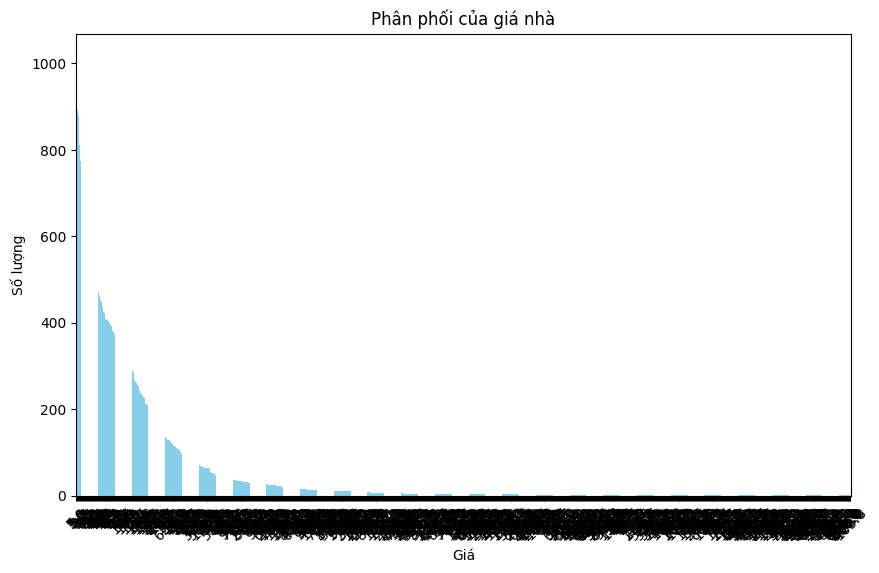

In [14]:
class_distribution = df_new['Giá'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân phối của giá nhà')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [44]:
df_new['Diện tích'] = df_new['Diện tích'].round(1)
df_new

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000
1,5.7,58.7,4.000000,5.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000
2,7.0,80.0,4.000000,12.000000,4.000000,4.000000,5.000000,0.000000,1.000000,0.000000
3,4.8,68.0,4.000000,5.000000,2.000000,4.000000,3.000000,0.000000,1.000000,0.000000
4,800.0,28.0,35.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
415464,48.5,81.1,3.797709,10.629963,2.281923,2.565520,1.371049,0.181802,0.080136,0.687008
415465,48.5,120.5,4.399811,3.954339,1.856052,2.315917,1.572127,-0.309333,0.822143,0.636120
415466,48.5,131.1,1.134163,2.429706,0.423004,2.232527,0.763622,-0.171435,0.581047,0.511502
415467,48.5,71.4,4.988161,4.230007,7.419242,11.401636,12.180503,0.432993,0.377769,0.545606


In [45]:
for i in df_new.columns[2:]:
    df_new[i] = df_new[i].round().astype(int)
df_new

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6,3,3,3,3,0,1,0
1,5.7,58.7,4,5,2,2,2,0,1,0
2,7.0,80.0,4,12,4,4,5,0,1,0
3,4.8,68.0,4,5,2,4,3,0,1,0
4,800.0,28.0,35,6,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
415464,48.5,81.1,4,11,2,3,1,0,0,1
415465,48.5,120.5,4,4,2,2,2,0,1,1
415466,48.5,131.1,1,2,0,2,1,0,1,1
415467,48.5,71.4,5,4,7,11,12,0,0,1


In [46]:
X = df_new.iloc[:,1:]
y = df_new['Giá']
print(X.head(5))
print(y.head(5))

   Diện tích  Mặt tiền  Đường trước nhà  Số tầng  Số phòng  Số toilet  \
0       36.0         6                3        3         3          3   
1       58.7         4                5        2         2          2   
2       80.0         4               12        4         4          5   
3       68.0         4                5        2         4          3   
4       28.0        35                6        2         1          1   

   Nội thất_cơ bản  Nội thất_không  Nội thất_đầy đủ  
0                0               1                0  
1                0               1                0  
2                0               1                0  
3                0               1                0  
4                0               1                0  
0      4.4
1      5.7
2      7.0
3      4.8
4    800.0
Name: Giá, dtype: float64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Gọi hàm cho từng mô hình
for model_name in tqdm(model_names, desc='Training models'):
    train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test)


Training models:  20%|█████████████▍                                                     | 1/5 [00:00<00:01,  3.79it/s]

LinearRegression MSE: 60017.34061898304
LinearRegression R-squared: 0.0011675134006962073


In [16]:
(nn_model,nn_mse,nn_r2) = train_and_evaluate_nn(X_train, X_test, y_train, y_test)

C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
3182/3182 [==============================] - 5s 1ms/step - loss: 55181.3281 - val_loss: 54242.9258
Epoch 2/50
3182/3182 [==============================] - 4s 1ms/step - loss: 54052.1172 - val_loss: 53468.6445
Epoch 3/50
3182/3182 [==============================] - 4s 1ms/step - loss: 54006.0195 - val_loss: 53393.4336
Epoch 4/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53981.3320 - val_loss: 53382.9336
Epoch 5/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53969.7383 - val_loss: 53337.5742
Epoch 6/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53938.4062 - val_loss: 53333.0586
Epoch 7/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53939.3672 - val_loss: 53294.7109
Epoch 8/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53909.3945 - val_loss: 53344.5859
Epoch 9/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53895.8438 - val_loss: 53409.7578
Epoch 10/5

In [59]:
df__new = df_.copy()
df__new

,Số lần,Model,MSE,R-squared
0,1,LinearRegression,8611.608550,0.028980
1,1,RandomForestRegressor,10568.968562,0.262443
2,1,XGBoost,6541.106319,-0.021104
3,1,SVR,6961.787390,0.215009
4,1,Decision Tree,9055.778914,-0.191727


In [63]:

df_ = df_.conatat(df__new, ignore_index=True)
df_

C:\Users\TanLoc\AppData\Local\Temp\ipykernel_24980\3233902828.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df__new, ignore_index=True)


,Số lần,Model,MSE,R-squared
0,1,1,1.000000,1.000000
1,1,LinearRegression,8611.608550,0.028980
2,1,RandomForestRegressor,10568.968562,0.262443
3,1,XGBoost,6541.106319,-0.021104
4,1,SVR,6961.787390,0.215009
5,1,Decision Tree,9055.778914,-0.191727


In [71]:
df_

,Số lần,Model,MSE,R-squared
0,0.0,LinearRegression,9705.077438,0.022560
1,0.0,RandomForestRegressor,9271.595579,0.279060
2,0.0,XGBoost,10934.453508,-0.023139
3,0.0,SVR,7607.463901,0.197998
4,0.0,Decision Tree,6838.536706,-0.152744
...,...,...,...,...
61,10.0,RandomForestRegressor,3313.442725,0.242011
62,10.0,XGBoost,5013.929851,0.177161
63,10.0,SVR,3898.690977,-0.245127
64,10.0,Decision Tree,4060.534643,-0.008367


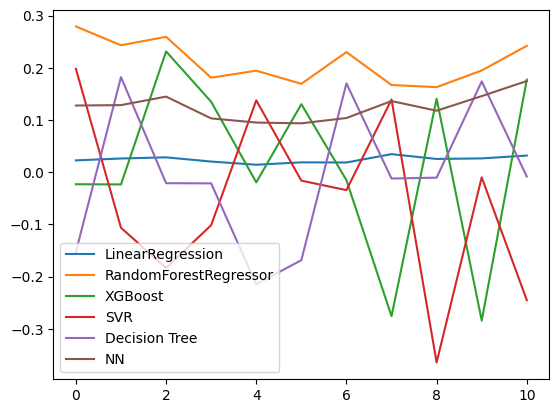

In [77]:
# plt.plot(df_['MSE'], label='MSE')
df_linear = df_[df_['Model'] == 'LinearRegression']
df_random = df_[df_['Model'] == 'RandomForestRegressor']
df_xg = df_[df_['Model'] == 'XGBoost']
df_svr = df_[df_['Model'] == 'SVR']
df_tree = df_[df_['Model'] == 'Decision Tree']
df_nn = df_[df_['Model'] == 'NN']
plt.plot(df_linear['Số lần'],df_linear['R-squared'], label='LinearRegression')
plt.plot(df_random['Số lần'],df_random['R-squared'], label='RandomForestRegressor')
plt.plot(df_xg['Số lần'],df_xg['R-squared'], label='XGBoost')
plt.plot(df_svr['Số lần'],df_svr['R-squared'], label='SVR')
plt.plot(df_tree['Số lần'],df_tree['R-squared'], label='Decision Tree')
plt.plot(df_nn['Số lần'],df_nn['R-squared'], label='NN')

plt.legend()

# Hiển thị biểu đồ
plt.show()

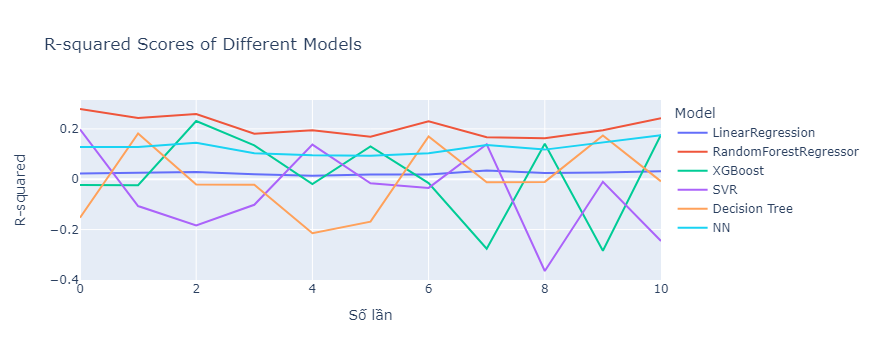

In [102]:
import plotly.express as px

# Tạo biểu đồ đường với Plotly Express
fig = px.line(df_, x='Số lần', y='R-squared', color='Model',
              title='R-squared Scores of Different Models')

# Hiển thị biểu đồ
fig.show()


In [80]:
df_.loc[df_['R-squared'].idxmax()]

Số lần                         0.0
Model        RandomForestRegressor
MSE                    9271.595579
R-squared                  0.27906
Name: 1, dtype: object

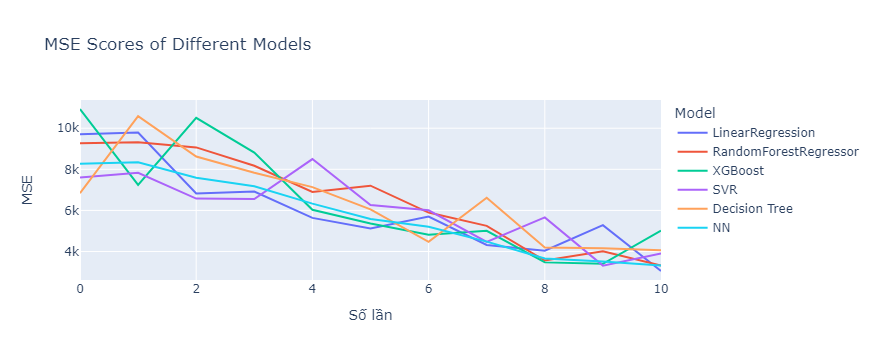

In [101]:
import plotly.express as px

# Tạo biểu đồ đường với Plotly Express
fig = px.line(df_, x='Số lần', y='MSE', color='Model',
              title='MSE Scores of Different Models')

# Hiển thị biểu đồ
fig.show()

In [105]:
df_.loc[df_['MSE'].idxmin()]

Số lần                   10.0
Model        LinearRegression
MSE               3052.300329
R-squared            0.031824
Name: 60, dtype: object